In [19]:
import math
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from collections import Counter
from keras import backend as K 
from keras.datasets import mnist, fashion_mnist
from keras.layers import Input, Dense, Dropout
from sklearn.preprocessing import OneHotEncoder
from sklearn.metrics import confusion_matrix, accuracy_score

# Define a class for a deep neural network

In [24]:
class DNN():
    def __init__(self, layer_size):
        self.layer_size = layer_size    # list of integers containing number of nodes in each hidden layer, the last number is the number of nodes in the output layer
        self.create_network()

    def create_network(self):
        input_data = Input(shape=self.layer_size[0])
        if len(self.layer_size)==2:
            output = Dense(self.layer_size[1], activation='relu')(input_data)
        elif len(self.layer_size)>2:
            x = Dense(self.layer_size[1], activation='relu')(input_data)
            for i  in range(2,len(self.layer_size)-1):
                x = Dense(self.layer_size[i], activation='relu')(x)
            output = Dense(self.layer_size[-1], activation='sigmoid')(x)
        else:
            print('Error: Layers sizes are unacceptable!')
        self.model = keras.models.Model(input_data, output, name='deep_neural_network')
        self.model.compile(optimizer='adam', loss='categorical_crossentropy')

    def print_summary(self):
        self.model.summary()

# Load MNIST Data

In [6]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.
x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))
print(x_train.shape, y_train.shape)
print(x_test.shape, y_test.shape)

(60000, 784) (60000,)
(10000, 784) (10000,)


In [9]:
one_hot_y_train = OneHotEncoder().fit_transform(y_train.reshape(len(y_train),1)).toarray()
one_hot_y_test = OneHotEncoder().fit_transform(y_test.reshape(len(y_test),1)).toarray()

# Select 10 distinct samples for visulaization purposes

In [11]:
selected_samples = np.zeros(10)
l = []
i = 0
while len(l)<10:
    if y_test[i] not in l:
        l.append(y_test[i])
        selected_samples[y_test[i]] = int(i)
        i = i + 1
    else:
        i = i + 1
selected_samples = list(selected_samples)
selected_samples = [int(s) for s in selected_samples]

# Creat and train a model

---------------------------------------------------------------------------------------
Model: "deep_neural_network"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 10)                330       
Total params: 104,938
Trainable params: 104,938
Non-trainable params: 0
_________________________________________________________________
Training the model ... 
Accuracy for this model is: %97


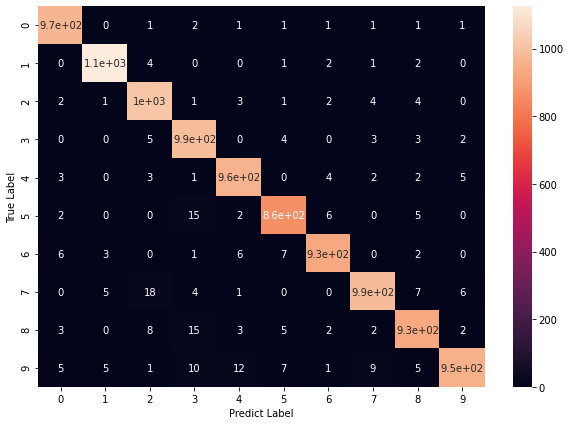

In [25]:
print('---------------------------------------------------------------------------------------')
K.clear_session() # this will clear previous models from the history
dnn = DNN(layer_size=[784, 128, 32, 10])
dnn.print_summary()
print('Training the model ... ')
dnn.model.fit(x_train,one_hot_y_train,
              epochs=10,
              batch_size=256,
              validation_split=0.3,
              verbose=0)
predict_probabilities = dnn.model.predict(x_test)
y_predict_classes = np.argmax(predict_probabilities, axis=1)
print('Accuracy for this model is: %' + str(int(accuracy_score(y_test, y_predict_classes)*100)))

plt.figure(figsize=(10,7))
ax = sns.heatmap(confusion_matrix(y_test,y_predict_classes), annot=True)
ax.set(xlabel='Predict Label', ylabel='True Label')
plt.show()

# Get the weights of the network

In [32]:
weights_and_biases = dnn.model.get_weights()
weights = []
biases = []
for i in range(len(weights_and_biases)):
    if i%2==0:
        weights.append(weights_and_biases[i])
    else:
        biases.append(weights_and_biases[i])
        

# Multiply weight matrices 

In [40]:
feature_score = np.eye(weights[0].shape[0])
for i in range(len(weights)):
    feature_score = np.matmul(feature_score, weights[i])

In [41]:
print(feature_score.shape)

(784, 10)


# Create heatmap of feature scores for each class

Original image of the digits:


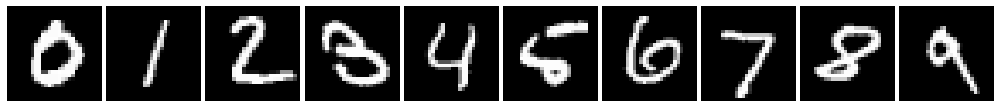

Score map of pixels for each class:


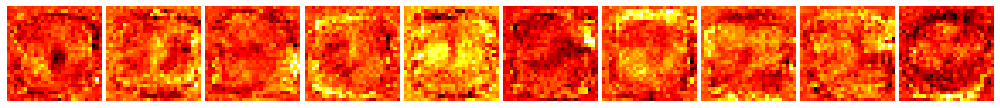

In [78]:
n_digits = 10

print('Original image of the digits:')
plt.figure(figsize=(14,4))
for digit in range(n_digits):
    # display original
    ax = plt.subplot(1, n_digits, digit+1)
    plt.imshow(x_test[selected_samples[digit]].reshape(28, 28))
    plt.gray()
    ax.axis("off")
plt.tight_layout()        
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.show() 

print('Score map of pixels for each class:')
plt.figure(figsize=(14,4))
for digit in range(n_digits):
    # display feature scores heatmap
    ax = plt.subplot(1, n_digits, digit+1)
    plt.imshow(feature_score[:,digit].reshape((28,28)), cmap='hot')
    ax.axis("off")
plt.tight_layout()        
plt.subplots_adjust(hspace=0.05, wspace=0.05)
plt.show()

# A closer look at each class:

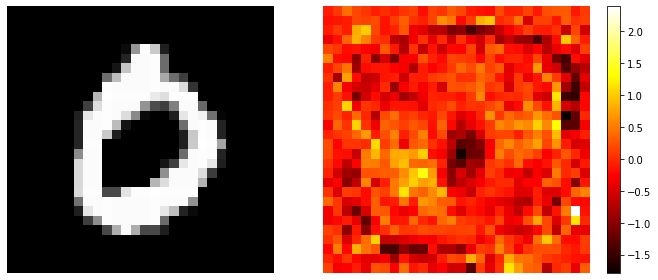

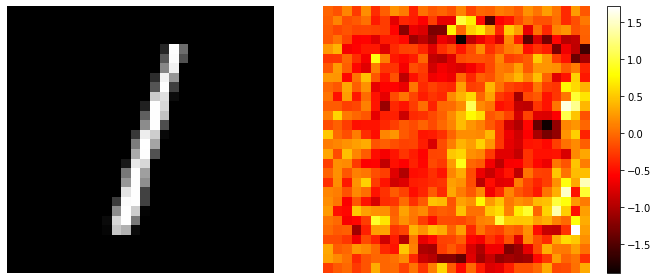

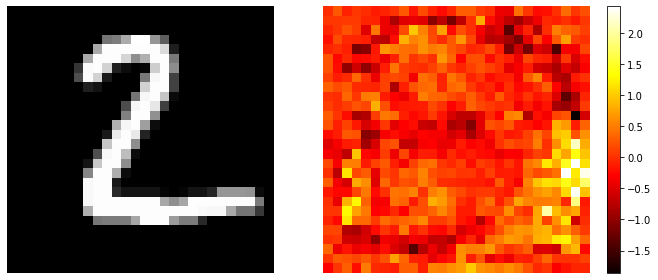

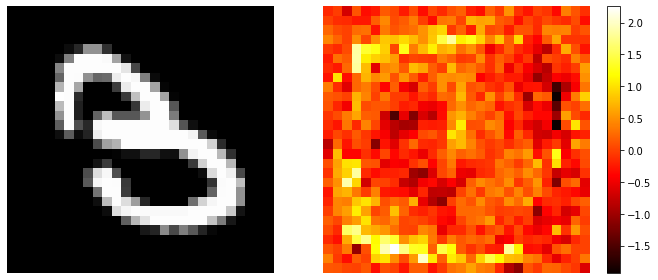

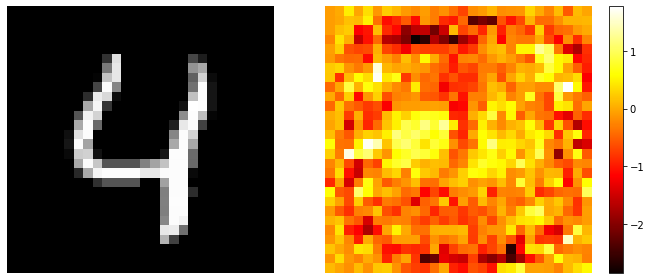

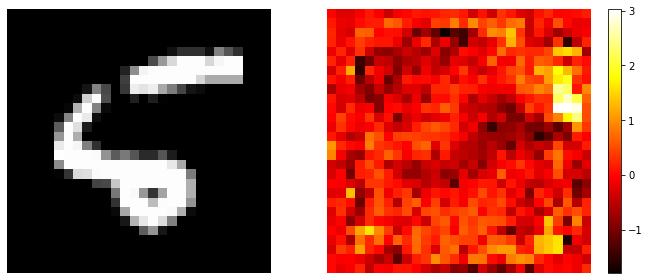

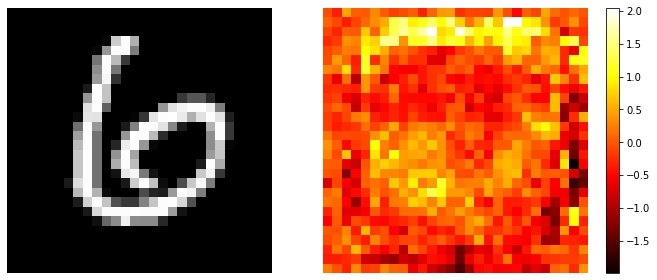

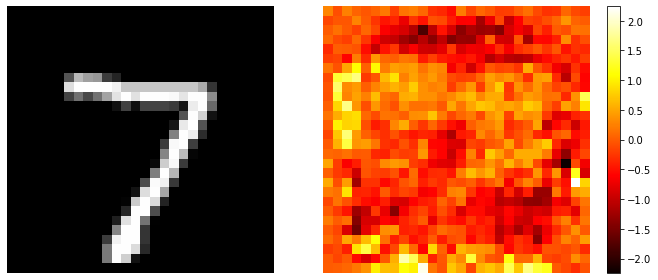

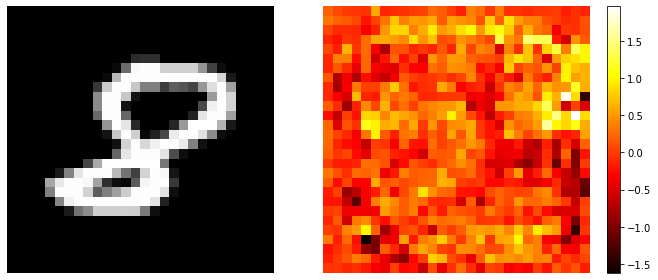

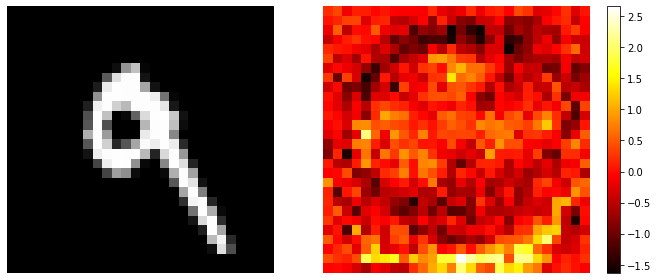

In [81]:

for digit in range(n_digits):
    plt.figure(figsize=(10,4))
    
    ax = plt.subplot(1, 2, 1)
    plt.imshow(x_test[selected_samples[digit]].reshape(28, 28))
    plt.gray()
    ax.axis("off")
    
    ax = plt.subplot(1, 2, 2)
    plt.imshow(feature_score[:,digit].reshape((28,28)), cmap='hot')
    plt.colorbar()
    ax.axis("off")
    
    plt.tight_layout()        
    plt.show() 